# <center><b> `HCHO Gas Forcasting model - ARIMA`</b></center>

### `Importing libraries`


In [125]:
import pandas as pd


### `Load the datasets`

In [126]:
df_col_mat_nuw = pd.read_csv('Data Sets\col_mat_nuw_output.csv')
df_kan = pd.read_csv('Data Sets\kan_output.csv')
df_mon_kur_jaf = pd.read_csv('Data Sets\mon_kur_jaf_output.csv')

In [127]:
# Adding Column names
columns = ['HCHO Value','Location','Date','Next Date']
df_col_mat_nuw.columns = columns
df_kan.columns = columns
df_mon_kur_jaf.columns = columns

In [128]:
print(df_col_mat_nuw.head())
print(df_kan.head())
print(df_mon_kur_jaf.head())

   HCHO Value        Location        Date   Next Date
0    0.000263  Colombo Proper  2019-01-02  2019-01-03
1    0.000099  Colombo Proper  2019-01-03  2019-01-04
2    0.000210  Colombo Proper  2019-01-04  2019-01-05
3    0.000179  Colombo Proper  2019-01-05  2019-01-06
4    0.000108  Colombo Proper  2019-01-06  2019-01-07
   HCHO Value      Location        Date   Next Date
0    0.000092  Kandy Proper  2019-01-02  2019-01-03
1         NaN  Kandy Proper  2019-01-03  2019-01-04
2    0.000191  Kandy Proper  2019-01-04  2019-01-05
3    0.000122  Kandy Proper  2019-01-05  2019-01-06
4   -0.000065  Kandy Proper  2019-01-06  2019-01-07
   HCHO Value            Location        Date   Next Date
0    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
1    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
2    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
3   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06
4    0.000146  Bibile, Monaragala  2019-01-06  2019-01-07


In [129]:
#check the location values
print(df_col_mat_nuw['Location'].unique())
print(df_kan['Location'].unique())
print(df_mon_kur_jaf['Location'].unique())


['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']
['Kandy Proper']
['Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


In [130]:
# check the data count for each location

location_counts = {
    'Colombo Proper': 0,
    'Deniyaya, Matara': 0,
    'Nuwara Eliya Proper': 0,
    'Kandy Proper': 0,
    'Bibile, Monaragala': 0,
    'Kurunegala Proper': 0,
    'Jaffna Proper': 0
}

for location in df_col_mat_nuw['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_kan['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_mon_kur_jaf['Location']:
    if location in location_counts:
        location_counts[location] += 1

for i in location_counts:
    print(i, location_counts[i])

Colombo Proper 1825
Deniyaya, Matara 1826
Nuwara Eliya Proper 1826
Kandy Proper 1825
Bibile, Monaragala 1825
Kurunegala Proper 1826
Jaffna Proper 1826


In [131]:
# Create separate dataframes for each location
colombo_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Colombo Proper']
Deniyaya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Deniyaya, Matara']
Nuwara_Eliya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Nuwara Eliya Proper']
Kandy_df = df_kan[df_kan['Location'] == 'Kandy Proper']
Bibile_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Bibile, Monaragala']
Kurunegala_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Kurunegala Proper']
Jaffna_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Jaffna Proper']

In [132]:
# check for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())

Colombo
 HCHO Value    487
Location        0
Date            0
Next Date       0
dtype: int64
Deniyaya
 HCHO Value    847
Location        0
Date            0
Next Date       0
dtype: int64
Nuwaraeliya
 HCHO Value    1085
Location         0
Date             0
Next Date        0
dtype: int64
Kandy
 HCHO Value    793
Location        0
Date            0
Next Date       0
dtype: int64
Bibile
 HCHO Value    694
Location        0
Date            0
Next Date       0
dtype: int64
Kurunegala
 HCHO Value    592
Location        0
Date            0
Next Date       0
dtype: int64
Jaffna
 HCHO Value    365
Location        0
Date            0
Next Date       0
dtype: int64


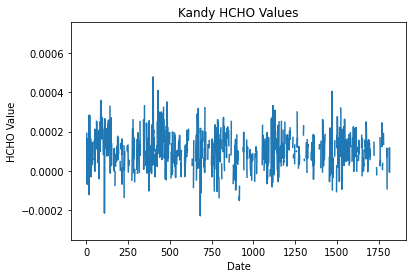

In [133]:
#plot the kandy HCHO values
import matplotlib.pyplot as plt
plt.plot(Kandy_df['HCHO Value'])
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.title('Kandy HCHO Values')
plt.show()


In [134]:
Kandy_df.head()

,HCHO Value,Location,Date,Next Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [135]:
Kandy_df['copy HCHO values'] = Kandy_df['HCHO Value']


In [136]:
Kandy_df.dtypes


HCHO Value          float64
Location             object
Date                 object
Next Date            object
copy HCHO values    float64
dtype: object

In [137]:
#droping Location, Next Date columns    
Kandy_df = Kandy_df.drop(['Location','Next Date'], axis=1)

In [138]:
Kandy_df.head()

,HCHO Value,Date,copy HCHO values
0,0.000092,2019-01-02,0.000092
1,NaN,2019-01-03,NaN
2,0.000191,2019-01-04,0.000191
3,0.000122,2019-01-05,0.000122
4,-0.000065,2019-01-06,-0.000065


In [139]:
Kandy_df.dtypes

HCHO Value          float64
Date                 object
copy HCHO values    float64
dtype: object

In [140]:
# Using interpolation to fill the missing values
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].interpolate(method='linear')

In [141]:
#check for null values
print('Kandy\n',Kandy_df.isnull().sum())

Kandy
 HCHO Value          793
Date                  0
copy HCHO values      0
dtype: int64


## `Stationary Test`

In [142]:
# importing adfuller
from statsmodels.tsa.stattools import adfuller

def adfuller_test(HCHO):
    result=adfuller(HCHO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        


In [143]:
Kandy_df.isnull().sum()

HCHO Value          793
Date                  0
copy HCHO values      0
dtype: int64

In [144]:
#checking the stationarity of the data
adfuller_test(Kandy_df['copy HCHO values'].dropna())

ADF Test Statistic : -8.392519109074408
p-value : 2.3458028638032573e-13
#Lags Used : 16
Number of Observations Used : 1808
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## `Diffrencing`

Since the data set is not stationary have to difffrence to make it statinary

<AxesSubplot:>

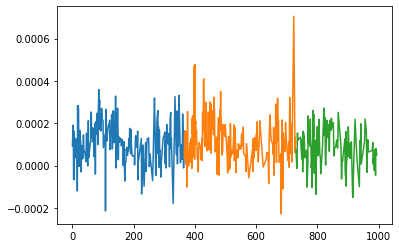

In [145]:
Kandy_df['copy HCHO values'][:365].plot()
Kandy_df['copy HCHO values'][365:730].plot()
Kandy_df['copy HCHO values'][730:995].plot()


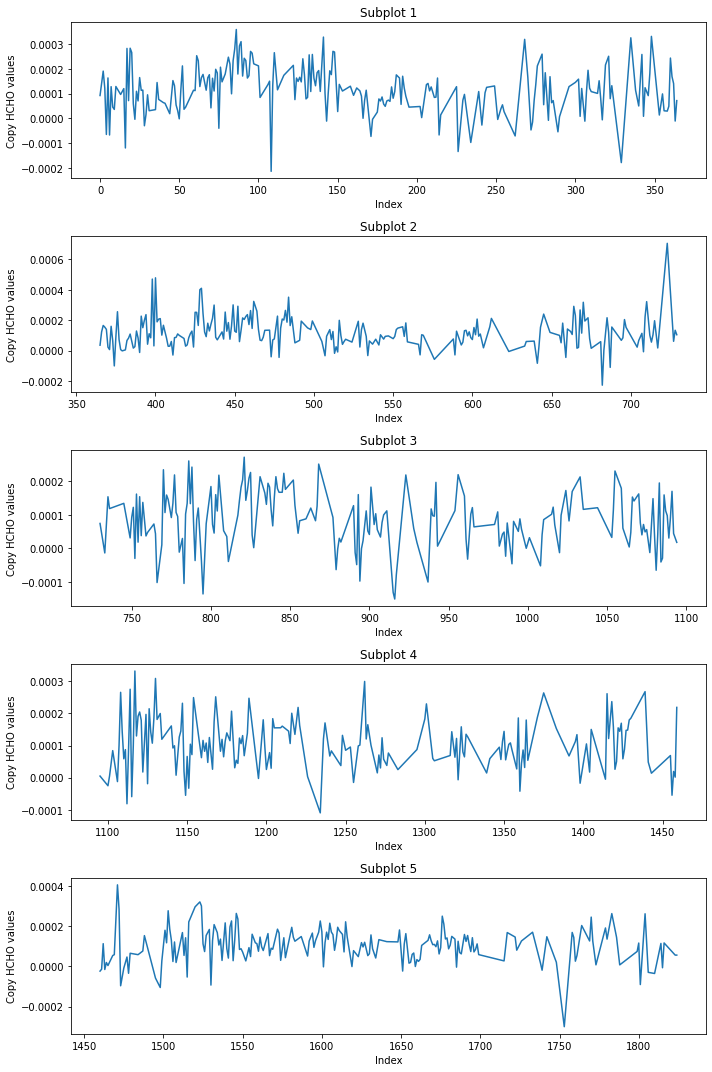

In [146]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(Kandy_df) // 365, ncols=1, figsize=(10, 15))

for i, ax in enumerate(axes):
    start_index = i * 365
    end_index = (i + 1) * 365
    data = Kandy_df['copy HCHO values'].iloc[start_index:end_index]
    ax.plot(data)
    ax.set_title(f"Subplot {i+1}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Copy HCHO values")

plt.tight_layout()
plt.show()


In [147]:
#import seaborn as sns

#sns.boxplot(Kandy_df['copy HCHO values'])

In [148]:
#plot a box plot and remove outliers Kandy_df['copy HCHO values']


'''Q1 = Kandy_df['copy HCHO values'].quantile(0.25)
Q3 = Kandy_df['copy HCHO values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Kandy_df = Kandy_df[(Kandy_df['copy HCHO values'] > lower_bound) & (Kandy_df['copy HCHO values'] < upper_bound)]

sns.boxplot(Kandy_df['copy HCHO values'])
'''

"Q1 = Kandy_df['copy HCHO values'].quantile(0.25)\nQ3 = Kandy_df['copy HCHO values'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\nKandy_df = Kandy_df[(Kandy_df['copy HCHO values'] > lower_bound) & (Kandy_df['copy HCHO values'] < upper_bound)]\n\nsns.boxplot(Kandy_df['copy HCHO values'])\n"

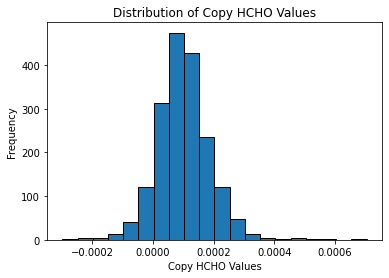

In [149]:
import matplotlib.pyplot as plt

# Assuming your copy HCHO values are stored in a variable called 'copy_hcho_values'
copy_hcho_values = Kandy_df['copy HCHO values']

# Plotting the distribution
plt.hist(copy_hcho_values, bins=20, edgecolor='black')
plt.xlabel('Copy HCHO Values')
plt.ylabel('Frequency')
plt.title('Distribution of Copy HCHO Values')
plt.show()


<AxesSubplot:ylabel='Density'>

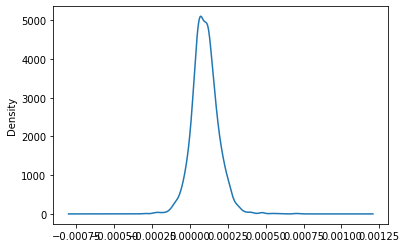

In [150]:
Kandy_df['copy HCHO values'].plot(kind='kde')

In [151]:
Kandy_df['Date']

0       2019-01-02
1       2019-01-03
2       2019-01-04
3       2019-01-05
4       2019-01-06
           ...    
1820    2023-12-27
1821    2023-12-28
1822    2023-12-29
1823    2023-12-30
1824    2023-12-31
Name: Date, Length: 1825, dtype: object

In [152]:
#setting index column
Kandy_df.index = pd.to_datetime(Kandy_df['Date'], format='%Y-%m-%d')


In [155]:
del Kandy_df['Date']

In [225]:
Kandy_df

,HCHO Value,copy HCHO values
Date,,
2019-01-02,0.000092,0.000092
2019-01-03,NaN,0.000092
2019-01-04,0.000191,0.000191
2019-01-05,0.000122,0.000122
2019-01-06,-0.000065,-0.000065
...,...,...
2023-12-27,NaN,0.000116
2023-12-28,NaN,0.000116
2023-12-29,NaN,0.000116


In [300]:
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].interpolate(method='spline', order=2)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

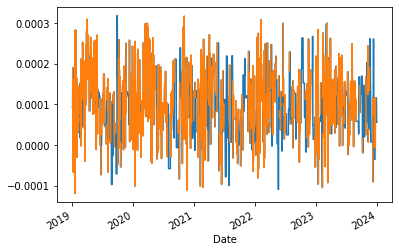

In [301]:
Kandy_df['copy HCHO values'].plot()
Kandy_df['HCHO Value'].plot()

<AxesSubplot:xlabel='Date'>

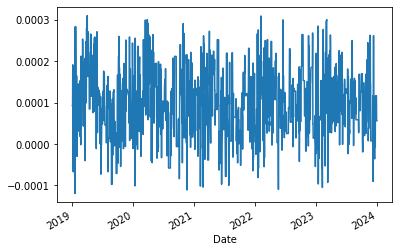

In [302]:
#remove outliers from copy HCHO values
Q1 = Kandy_df['copy HCHO values'].quantile(0.25)
Q3 = Kandy_df['copy HCHO values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Kandy_df = Kandy_df[(Kandy_df['copy HCHO values'] > lower_bound) & (Kandy_df['copy HCHO values'] < upper_bound)]

Kandy_df['copy HCHO values'].plot()


<AxesSubplot:xlabel='Date'>

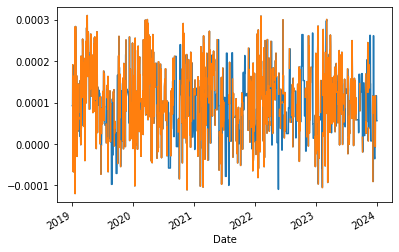

In [303]:
Kandy_df['copy HCHO values'].plot()
Kandy_df['HCHO Value'].plot()

In [304]:
adfuller_test(Kandy_df['copy HCHO values'].dropna())

ADF Test Statistic : -15.049060187452996
p-value : 9.35148972475036e-28
#Lags Used : 2
Number of Observations Used : 1774
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

"\n#forecasting the future values\nimport statsmodels.api as sm\n\nmodel = sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))\nresults = model.fit()\nKandy_df['forecast'] = results.predict(start=1500, end=1824, dynamic=True)\nKandy_df[['copy HCHO values', 'forecast']].plot(figsize=(12, 8))\n"

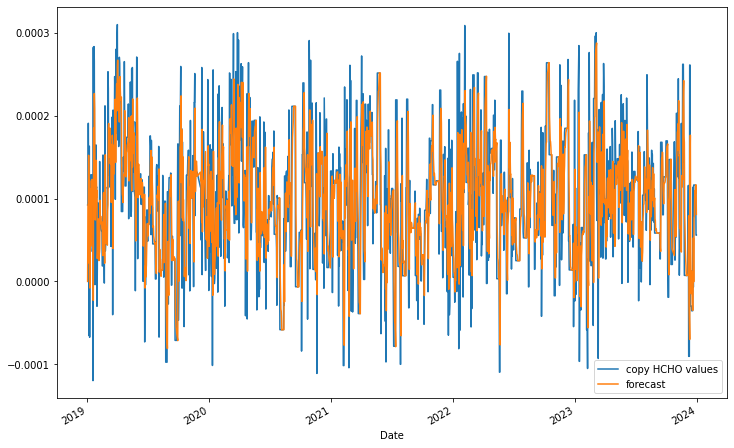

In [305]:
#arima model for copy HCHO values
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(Kandy_df['copy HCHO values'], order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

Kandy_df['forecast'] = model_fit.get_prediction().predicted_mean
Kandy_df[['copy HCHO values','forecast']].plot(figsize=(12,8))
'''
#forecasting the future values
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
Kandy_df['forecast'] = results.predict(start=1500, end=1824, dynamic=True)
Kandy_df[['copy HCHO values', 'forecast']].plot(figsize=(12, 8))
'''



In [306]:
Kandy_df['forecast']

Date
2019-01-02    0.000000
2019-01-03    0.000092
2019-01-04    0.000092
2019-01-05    0.000152
2019-01-06    0.000124
                ...   
2023-12-27    0.000110
2023-12-28    0.000106
2023-12-29    0.000117
2023-12-30    0.000116
2023-12-31    0.000081
Name: forecast, Length: 1777, dtype: float64

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

<AxesSubplot:xlabel='Date'>

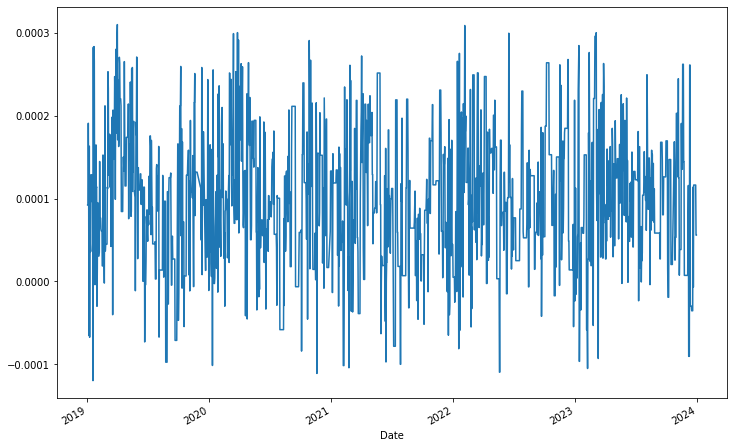

In [307]:
#forecasting the future values
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
forecast = results.forecast(steps=365)
Kandy_df['copy HCHO values'].plot(figsize=(12, 8))

<AxesSubplot:>

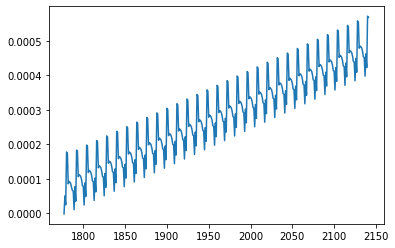

In [308]:
forecast.plot()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

<AxesSubplot:xlabel='Date'>

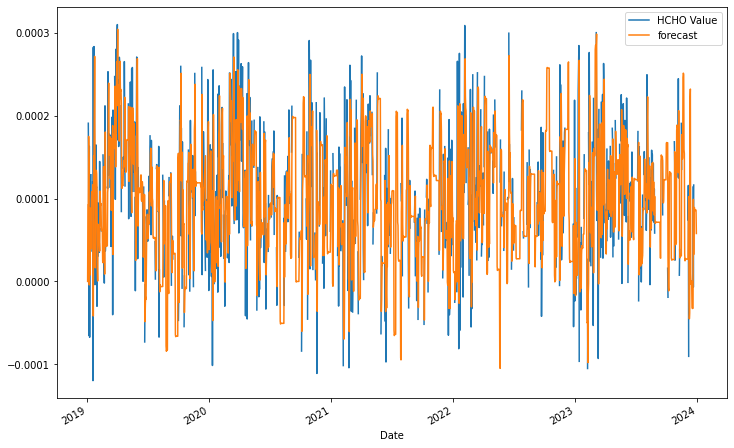

In [309]:
#ARMAX model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Kandy_df['HCHO Value'], order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

Kandy_df['forecast'] = model_fit.get_prediction().predicted_mean
Kandy_df[['HCHO Value','forecast']].plot(figsize=(12,8))



<AxesSubplot:xlabel='Date'>

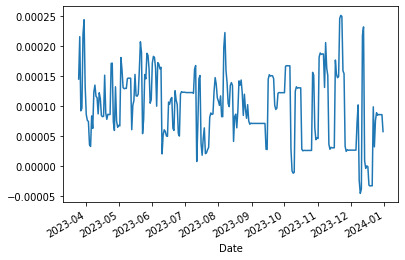

In [310]:
Kandy_df['forecast'][1500:1824].plot()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:>

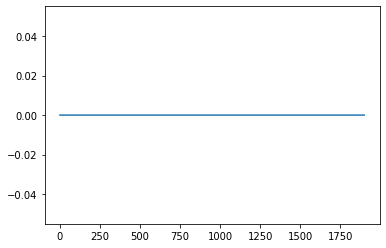

In [311]:
startdate = 0
enddate = 1900

tf = model_fit.predict(start=startdate, end=enddate, dynamic=True)
tf.plot()

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Import today's date from code
todays_date = datetime(2024, 1, 1)#datetime.today().date()

# Read the CSV file into a DataFrame

order = (1, 0, 1)

# Fit ARIMA model
model = ARIMA(Kandy_df['copy HCHO values'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 7 days from today's date
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
predictions = []
# Print the predicted exchange rates for the next 7 days
print("Predicted Exchange Rates for the Next 7 Days:")
for i in range(forecast_steps):
   prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
   print(f"{prediction_date}: {forecast_values.iloc[i]}")
   predictions.append(forecast_values.iloc[i])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

                               SARIMAX Results                                
Dep. Variable:       copy HCHO values   No. Observations:                 1777
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14548.195
Date:                Tue, 16 Apr 2024   AIC                         -29088.390
Time:                        16:58:43   BIC                         -29066.459
Sample:                             0   HQIC                        -29080.289
                               - 1777                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.821e-05   4.16e-06     23.585      0.000       9e-05       0.000
ar.L1          0.7108    1.9e-11   3.73e+10      0.000       0.711       0.711
ma.L1         -0.2455   2.62e-11  -9.37e+09      0.0

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [317]:
forecast_values

1777    0.000074
1778    0.000081
1779    0.000086
1780    0.000090
1781    0.000092
1782    0.000094
1783    0.000095
1784    0.000096
1785    0.000097
1786    0.000097
1787    0.000097
1788    0.000098
1789    0.000098
1790    0.000098
1791    0.000098
1792    0.000098
1793    0.000098
1794    0.000098
1795    0.000098
1796    0.000098
1797    0.000098
1798    0.000098
1799    0.000098
1800    0.000098
1801    0.000098
1802    0.000098
1803    0.000098
1804    0.000098
1805    0.000098
1806    0.000098
Name: predicted_mean, dtype: float64

In [314]:
Kandy_df.tail()

,HCHO Value,copy HCHO values,forecast
Date,,,
2023-12-27,NaN,0.000116,0.000086
2023-12-28,NaN,0.000116,0.000086
2023-12-29,NaN,0.000116,0.000086
2023-12-30,0.000056,0.000056,0.000086
2023-12-31,NaN,0.000056,0.000058


<AxesSubplot:>

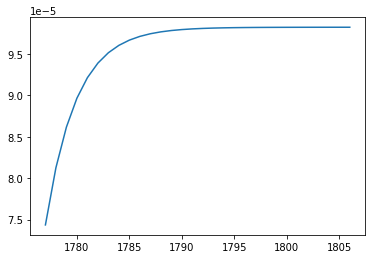

In [318]:
forecast_values.plot()


In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
vals = []
forecast_df = pd.DataFrame(columns=['Date', 'copy HCHO values'])


# Import today's date from code
todays_date = datetime(2024, 1, 1)#datetime.today().date()

# Read the CSV file into a DataFrame

order = (1, 1, 0)

# Fit ARIMA model
model = ARIMA(Kandy_df['copy HCHO values'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 7 days from today's date
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
predictions = []
    # Print the predicted exchange rates for the next 7 days
print("Predicted Exchange Rates for the Next 30 Days:")
for i in range(forecast_steps):
    prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
    print(f"{prediction_date}: {forecast_values.iloc[i]}")
    predictions.append(forecast_values.iloc[i])
    Kandy_df.loc[-1 + 1, 'copy HCHO values'] = forecast_values.iloc[i]
    forecast_df = forecast_df.append({'Date': prediction_date, 'copy HCHO value': forecast_values.iloc[i]}, ignore_index=True)
    vals.append(forecast_values.iloc[i])

                               SARIMAX Results                                
Dep. Variable:       copy HCHO values   No. Observations:                 1778
Model:                 ARIMA(1, 1, 0)   Log Likelihood               14395.451
Date:                Tue, 16 Apr 2024   AIC                         -28786.901
Time:                        17:41:38   BIC                         -28775.936
Sample:                             0   HQIC                        -28782.851
                               - 1778                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3202   1.49e-19  -2.14e+18      0.000      -0.320      -0.320
sigma2      5.387e-09    1.3e-10     41.464      0.000    5.13e-09    5.64e-09
Ljung-Box (L1) (Q):                   9.95   Jarque-

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-pa

In [371]:
forecast_df.tail(30)

,Date,copy HCHO values,copy HCHO value
0,2024-01-02,NaN,0.000085
1,2024-01-03,NaN,0.000089
2,2024-01-04,NaN,0.000088
3,2024-01-05,NaN,0.000088
4,2024-01-06,NaN,0.000088
5,2024-01-07,NaN,0.000088
6,2024-01-08,NaN,0.000088
7,2024-01-09,NaN,0.000088
8,2024-01-10,NaN,0.000088
9,2024-01-11,NaN,0.000088


In [360]:
Kandy_df['copy HCHO values'].tail(30)

Date
2023-12-03 00:00:00    0.000007
2023-12-04 00:00:00    0.000007
2023-12-05 00:00:00    0.000007
2023-12-06 00:00:00    0.000074
2023-12-07 00:00:00    0.000116
2023-12-08 00:00:00   -0.000090
2023-12-09 00:00:00   -0.000090
2023-12-10 00:00:00   -0.000090
2023-12-11 00:00:00    0.000261
2023-12-12 00:00:00    0.000261
2023-12-13 00:00:00   -0.000030
2023-12-14 00:00:00   -0.000030
2023-12-15 00:00:00   -0.000030
2023-12-16 00:00:00   -0.000030
2023-12-17 00:00:00   -0.000035
2023-12-18 00:00:00   -0.000035
2023-12-19 00:00:00   -0.000035
2023-12-20 00:00:00   -0.000035
2023-12-21 00:00:00    0.000114
2023-12-22 00:00:00   -0.000007
2023-12-23 00:00:00    0.000116
2023-12-24 00:00:00    0.000116
2023-12-25 00:00:00    0.000116
2023-12-26 00:00:00    0.000116
2023-12-27 00:00:00    0.000116
2023-12-28 00:00:00    0.000116
2023-12-29 00:00:00    0.000116
2023-12-30 00:00:00    0.000056
2023-12-31 00:00:00    0.000056
0                      0.000098
Name: copy HCHO values, dtype: floa

<AxesSubplot:xlabel='Date'>

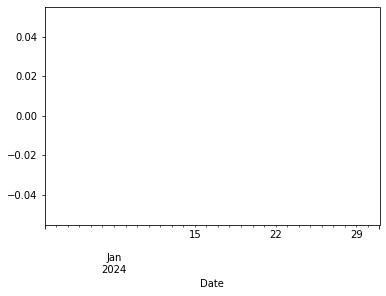

In [361]:
forecast_df['copy HCHO values'].plot()


In [346]:
Kandy_df['copy HCHO values'].tail()

Date
2023-12-28 00:00:00    0.000116
2023-12-29 00:00:00    0.000116
2023-12-30 00:00:00    0.000056
2023-12-31 00:00:00    0.000056
0                      0.000098
Name: copy HCHO values, dtype: float64

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Create an empty DataFrame to store the forecasted values
forecast_df = pd.DataFrame(columns=['Date', 'copy HCHO values'])

# Import today's date
todays_date = datetime(2024, 1, 1)

# Define the order and seasonal_order for the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order with a yearly seasonality

# Fit SARIMA model
model = SARIMAX(Kandy_df['copy HCHO values'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 30 days from today's date
forecast_steps = 30
forecast_values = results.forecast(steps=forecast_steps)

# Print the predicted values for the next 30 days and add them to the forecast DataFrame
for i in range(forecast_steps):
    prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
    print(f"{prediction_date}: {forecast_values.iloc[i]}")
    forecast_df = forecast_df.append({'Date': prediction_date, 'copy HCHO values': forecast_values.iloc[i]}, ignore_index=True)

# Display the forecast DataFrame
print(forecast_df)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   copy HCHO values   No. Observations:                 1778
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               14160.299
Date:                            Tue, 16 Apr 2024   AIC                         -28310.597
Time:                                    19:24:21   BIC                         -28283.218
Sample:                                         0   HQIC                        -28300.480
                                           - 1778                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2613    4.8e-19   5.45e+17      0.000       0.261       0.261
ma.L1         -0.6347   6.44e-19  -

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:>

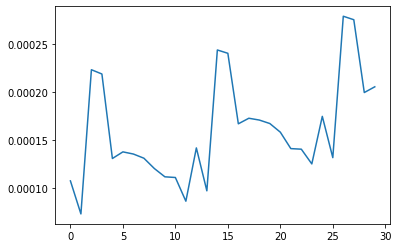

In [374]:
forecast_df['copy HCHO values'].plot()